# Relationship of Sugar & Velocity

In [62]:
import sys
import os
sys.path.append(os.path.abspath(".."))
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
from utils.libaries import *
from utils.data_loading import findFiles,LoadDataSignals
from utils.global_parameters import *
from Data_Denoising.data_denoising import *
from Data_Denoising.time_synchronization import *
from Data_Denoising.moving_average_filter import *
from Data_Denoising.derivative_filtering import apply_improved_derivative_filter
from Data_Denoising.dc_offset_removal import *
from plotting_module.signal_plot import *
from Data_Denoising.bandpass_filtering import *
from waveform_detection.detect_waveform import *
from waveform_detection.pan_algorithm import *
from time_of_flight_calculation.zero_crossings import *
from time_of_flight_calculation.tof import *
from time_of_flight_calculation.velocity import *
from time_of_flight_calculation.sugar_velocity_relationship import *
from plotting_module.signal_veclocity_plot import *


#### Extract relevant files for processing


##### Velocity using TOF & Pan Tomkins Algorithm & Waveform Detection using Thresholding

In [64]:
waveforms=["sin","squ"]
expected_periods= ["1","5","9"]

expected_waveform= waveforms[1]
periods= expected_periods[0]

unique_file_list= findFiles(expected_waveform,periods,sample_number=1)
unique_file_list

['/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/144000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-144000mg-squ1-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/108000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-108000mg-squ1-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/36000mg/2025may28-ram-WaterSugar_mid_solution-36000mg-squ1-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/18000mg/2025may28-ram-WaterSugar_mid_solution-18000mg-squ1-pure_water_solution_1.mat',
 '/Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental sign

In [65]:
tof_methods = ['peak_to_peak', 'zero_crossing', 'cross_correlation']


In [66]:
velocities,time_of_flight,actual_waveform,receive_selected_index_list,transmit_selected_index_list =process_signals(unique_file_list, tof_method_index=1)



 File Name: /Users/madhviasthana/Documents/Experimental Signal Preprocessing  /Experimental signal processing/dataset/28_May_2025/144000mg/28thmaynewsetup1percentage25DegreeTemperatureMarch-ram-WaterSugar_mid_solution-144000mg-squ1-pure_water_solution_1.mat
shape of raw signal:  (100, 2, 16000)
Period:  1
Concentration:  144000
DC Offset Removal - Transmit: (100, 16000)  | Receive: (100, 16000)
Dynamic Start Threshold: 0.5
Dynamic End Threshold: 0.2
Dynamic Start Threshold: 0.01
Dynamic End Threshold: 0.005
Transmit [(2, 20)]
Recieve [(6116, 8662)]
extrema_indices:  [2]
Signal at index 2: -164439.875 (sign: -1.0)
Signal slice after index 2: [-400199.88 -605040.9  -440616.88 -457977.88 -512622.88 -512875.88
 -518793.88]
extrema_index: 2 type: <class 'int'>
extrema_indices:  [6116]
Signal at index 2: -136380.796875 (sign: -1.0)
Signal slice after index 2: [ -95651.8  -168117.8  -515828.78 -650159.8  -546632.8  -466226.78
 -501964.78]
extrema_index: 6116 type: <class 'int'>
Time of Flig

#### Sort the velocity wrt concentration

In [67]:
velocities = sorted(velocities, key=lambda x : x[0])
velocities

[[1.0588235294117647, 1676.7164511861276],
 [2.1176470588235294, 1678.1876593844136],
 [3.1764705882352944, 1681.6421317554684],
 [4.235294117647059, 1688.7530781780092],
 [5.294117647058823, 1687.6929666136718],
 [6.352941176470589, 1693.2986105046962],
 [7.411764705882354, 1696.1325027164087],
 [8.470588235294118, 1698.2238960533914]]

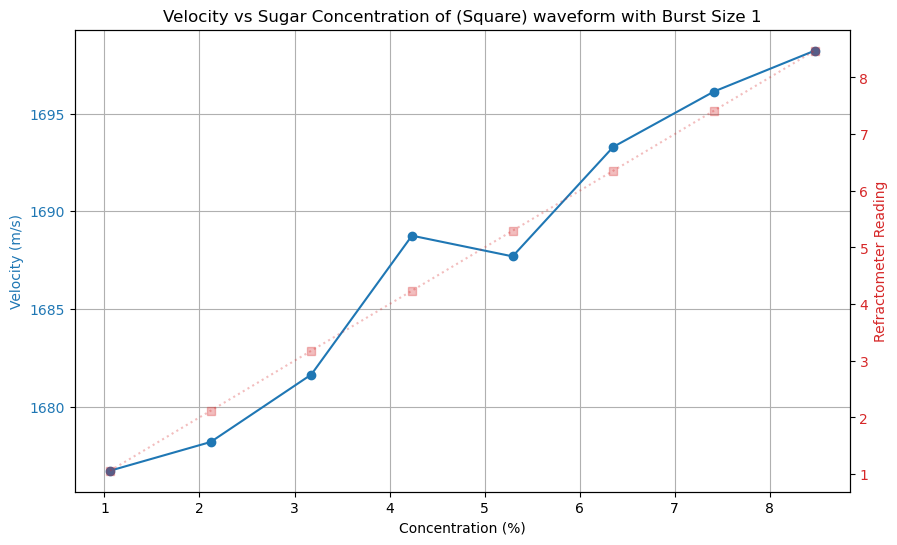

In [68]:
plot_velocity_refractometer(velocities, periods)